<a href="https://colab.research.google.com/github/Lipkoffsky/ML_pet_projects/blob/main/IrisFlowerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт датасета Ирисы Фишера**

In [2]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

# Реализация Персептрона

In [3]:
import numpy as np

In [4]:
class Perceptron(object):
    """Классификатор на основе персептрона.

    Параметры 
    ---------
    eta : float
        Темп обучения между 0.0 и 1.0
    n_iter: int
        Проходы по тренировочному набору данных

    Атрибуты
    --------
    w_ : array(1,n)
        Весовые коэффициенты после подгонки
    errors_ : list
        Число случаев ошибочной классификации в каждой эпохе
    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        '''Выполнить подгонку модели под тренировочные данные
        
        Параметры
        ---------
        X : array(n_samples, n_features)
            Тренировочные векторы, где 
            n_samples - число образцов
            n_features - число признаков
        y : array(n_samples)
            Целевые значения

        Return
        ------
        self.object

        '''

        # Инициализация весов и списка ошибок
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # Подгонка
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0]  += update
                errors      += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        '''Рассчитать чистый вход'''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        '''Вернуть метку класса после единичного скачка'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

# ***Тренировка персептрона***

Выделим 1-50 меток класса ( Iris Versicolor) они будут соответствовать значению 1
Следующие 50-100 (Iris Setosa) будут соответствовать -1

Обучать будем по двум параметрам: по длине чашелистика и по длине лепестка

In [5]:
import matplotlib.pyplot as plt
import numpy as np

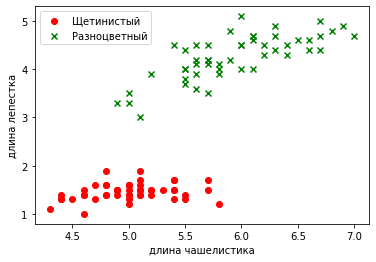

In [6]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red'
            , marker='o', label='Щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1], color='green'
            , marker='x', label='Разноцветный')
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.show()

*Обучение*

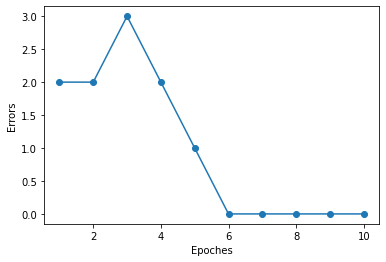

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Errors')
plt.show()

Вспомогательные функции

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    '''Отобразить границы решений для двумерных наборов данных'''

    # Настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution)
                          ,np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1]
                   ,alpha=0.8, c=cmap(idx)
                   ,marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


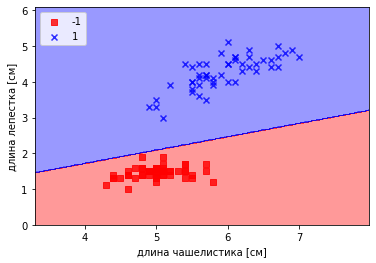

In [16]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()